TRABAJAREMOS SOBRE UN DATASET CON DATOS DE CLIENTES DE UN BANCO.
LA IDEA ES APRENDER A RECONOCER LAS CARACTERÍSTICAS DE LOS CLIENTES MOROSOS, APRENDIENDO DE LAS CARACTERÍSTICAS DEL DATASET.
Los datos se han hecho anónimos para proteger la privacidad de los clientes.


In [5]:
# CARGAMOS LAS LIBRERÍAS QUE USAREMOS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [6]:
# # SUBIMOS Y CARGAMOS EL DATASET

url='https://github.com/palasatenea66/DATASETS/raw/refs/heads/main/credito.csv'

In [7]:
credito = pd.read_csv(url)
credito2=credito.copy()
# print(f'Forma: {credito.shape}')
# print(f'Columnas: {credito.columns}')
credito

,ID,ingresos,edad,provincia_codigo,bancarizado,BCRA_Peor_Situacion,Cantidad_consultas_7_dias,Compromisos_Mensual,Endeudamiento_Externo,Nivel_Socioeconomico,...,autonomo,Es_jubilado,relacion_dependencia,dias_atraso,Cuota,cant_cuotas,Monto_Otorgado,PRODUCTO,PROVINCIA,moroso
0,1,35000.0,35,X,1,1,1.0,9976.0,170000.0,4,...,F,F,UNIVERSIDAD NACIONAL DE CORDOBA ...,143,8957.00,12,50000.0,DS_SUCURSAL_ORO,CORDOBA,1
1,2,50000.0,24,B,1,3,0.0,16807.0,236000.0,4,...,F,F,POLICIA FEDERAL ARGENTINA ...,174,6874.49,9,25000.0,DS_BASICO,BUENOS AIRES,1
2,3,50000.0,42,X,1,1,5.0,42959.0,683343.0,3,...,F,F,MINISTERIO DE EDUCACION ...,0,4191.93,12,23400.0,DS_SUCURSAL_ORO,CORDOBA,0
3,4,32000.0,21,H,1,1,3.0,7583.0,76000.0,5,...,F,F,CONTADURIA GENERAL DEL EJERCITO ...,23,3667.60,12,16000.0,DS_BASICO,CHACO,0
4,5,50000.0,21,Z,1,1,4.0,1040.0,23000.0,5,...,F,F,CONTADURIA GENERAL DEL EJERCITO ...,0,3891.04,6,15000.0,DS_SUCURSAL_ORO,SANTA CRUZ,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,1186,50000.0,51,Q,0,0,0.0,0.0,0.0,-1,...,0,0,0,0,5557.65,12,32000.0,DS_REFINANCIACION,NEUQUEN,0
1186,1187,46240.0,32,C,1,1,0.0,3010.0,49000.0,3,...,F,F,POLICIA FEDERAL ARGENTINA ...,0,2594.03,6,10000.0,DS_SUCURSAL_ORO,CAPITAL FEDERAL,0
1187,1188,42866.0,21,B,1,1,18.0,3998.0,46000.0,3,...,F,F,SANOFI PASTEUR SA,58,8957.10,12,50000.0,DS_SUCURSAL_ORO,BUENOS AIRES,0
1188,1189,17000.0,38,B,0,0,0.0,0.0,0.0,-1,...,0,0,0,28,7633.03,6,30000.0,DS_REFINANCIACION,BUENOS AIRES,0


In [8]:
credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         1190 non-null   int64  
 1   ingresos                   1190 non-null   float64
 2   edad                       1190 non-null   int64  
 3   provincia_codigo           1190 non-null   object 
 4   bancarizado                1190 non-null   int64  
 5   BCRA_Peor_Situacion        1190 non-null   int64  
 6   Cantidad_consultas_7_dias  1189 non-null   float64
 7   Compromisos_Mensual        1190 non-null   float64
 8   Endeudamiento_Externo      1190 non-null   float64
 9   Nivel_Socioeconomico       1190 non-null   int64  
 10  Deuda_normal               1190 non-null   float64
 11  Deuda_30                   1190 non-null   float64
 12  Deuda_90                   1190 non-null   float64
 13  deuda_120                  1190 non-null   float

In [9]:
credito.describe().T

# muestra un resumen estadístico de las columnas numéricas del DataFrame credito:

# count: cantidad de valores no nulos.
# mean: media.
# std: desviación estándar.
# min: valor mínimo.
# 25%, 50%, 75%: percentiles (cuartiles).
# max: valor máximo.

,count,mean,std,min,25%,50%,75%,max
ID,1190.0,595.500000,343.667717,1.0,298.2500,595.50,892.75,1190.00
ingresos,1190.0,53437.669538,43665.378404,12924.0,33539.6175,47000.00,63000.00,930000.00
edad,1190.0,43.843697,13.781331,18.0,33.0000,42.00,53.00,121.00
bancarizado,1190.0,0.642017,0.479609,0.0,0.0000,1.00,1.00,1.00
BCRA_Peor_Situacion,1190.0,0.889076,1.231544,-1.0,0.0000,1.00,1.00,5.00
Cantidad_consultas_7_dias,1189.0,1.879731,2.768540,0.0,0.0000,1.00,3.00,18.00
Compromisos_Mensual,1190.0,9321.036134,14235.963408,0.0,0.0000,3639.00,13106.00,177911.00
Endeudamiento_Externo,1190.0,152621.008403,240678.479013,0.0,0.0000,54011.50,227061.25,3206484.00
Nivel_Socioeconomico,1190.0,2.902521,2.750135,-1.0,-1.0000,4.00,5.00,7.00
Deuda_normal,1190.0,150607.071429,239969.973391,0.0,0.0000,53000.00,223000.00,3206484.00


In [10]:
# VEMOS SI HAY VALORES NULL O NaN
print(f"¿Tiene datos en null o NaN? {credito.isnull().any().any()}")
print("¿Qué columnas poseen null o NaN?")
display(credito.isnull().any())

¿Tiene datos en null o NaN? True
¿Qué columnas poseen null o NaN?


ID                           False
ingresos                     False
edad                         False
provincia_codigo             False
bancarizado                  False
BCRA_Peor_Situacion          False
Cantidad_consultas_7_dias     True
Compromisos_Mensual          False
Endeudamiento_Externo        False
Nivel_Socioeconomico         False
Deuda_normal                 False
Deuda_30                     False
Deuda_90                     False
deuda_120                    False
deuda_180                    False
canti_moras                  False
autonomo                     False
Es_jubilado                  False
relacion_dependencia          True
dias_atraso                  False
Cuota                        False
cant_cuotas                  False
Monto_Otorgado               False
PRODUCTO                     False
PROVINCIA                    False
moroso                       False
dtype: bool

In [11]:
# HAY QUE EMPEZAR A TOMAR DECISIONES SOBRE LOS DATOS

credito.shape

(1190, 26)

In [12]:
# ASIGNAMOS LA COLUMNA 'ID' COMO ÍNDICE DEL DATAFRAME
credito.set_index(['ID'], inplace = True)
print(credito.shape)
credito


(1190, 25)


,ingresos,edad,provincia_codigo,bancarizado,BCRA_Peor_Situacion,Cantidad_consultas_7_dias,Compromisos_Mensual,Endeudamiento_Externo,Nivel_Socioeconomico,Deuda_normal,...,autonomo,Es_jubilado,relacion_dependencia,dias_atraso,Cuota,cant_cuotas,Monto_Otorgado,PRODUCTO,PROVINCIA,moroso
ID,,,,,,,,,,,,,,,,,,,,,
1,35000.0,35,X,1,1,1.0,9976.0,170000.0,4,170000.0,...,F,F,UNIVERSIDAD NACIONAL DE CORDOBA ...,143,8957.00,12,50000.0,DS_SUCURSAL_ORO,CORDOBA,1
2,50000.0,24,B,1,3,0.0,16807.0,236000.0,4,187000.0,...,F,F,POLICIA FEDERAL ARGENTINA ...,174,6874.49,9,25000.0,DS_BASICO,BUENOS AIRES,1
3,50000.0,42,X,1,1,5.0,42959.0,683343.0,3,683343.0,...,F,F,MINISTERIO DE EDUCACION ...,0,4191.93,12,23400.0,DS_SUCURSAL_ORO,CORDOBA,0
4,32000.0,21,H,1,1,3.0,7583.0,76000.0,5,76000.0,...,F,F,CONTADURIA GENERAL DEL EJERCITO ...,23,3667.60,12,16000.0,DS_BASICO,CHACO,0
5,50000.0,21,Z,1,1,4.0,1040.0,23000.0,5,23000.0,...,F,F,CONTADURIA GENERAL DEL EJERCITO ...,0,3891.04,6,15000.0,DS_SUCURSAL_ORO,SANTA CRUZ,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,50000.0,51,Q,0,0,0.0,0.0,0.0,-1,0.0,...,0,0,0,0,5557.65,12,32000.0,DS_REFINANCIACION,NEUQUEN,0
1187,46240.0,32,C,1,1,0.0,3010.0,49000.0,3,49000.0,...,F,F,POLICIA FEDERAL ARGENTINA ...,0,2594.03,6,10000.0,DS_SUCURSAL_ORO,CAPITAL FEDERAL,0
1188,42866.0,21,B,1,1,18.0,3998.0,46000.0,3,46000.0,...,F,F,SANOFI PASTEUR SA,58,8957.10,12,50000.0,DS_SUCURSAL_ORO,BUENOS AIRES,0


In [13]:
# TENEMOS 2 COLUMNAS QUE DESCRIBEN LO MISMO, LA PROVINCIA. ASÍ QUE NOS QUEDAREMOS CON UNA SOLA
credito.drop(['provincia_codigo'], axis = 1, inplace = True)
credito.columns

Index(['ingresos', 'edad', 'bancarizado', 'BCRA_Peor_Situacion',
       'Cantidad_consultas_7_dias', 'Compromisos_Mensual',
       'Endeudamiento_Externo', 'Nivel_Socioeconomico', 'Deuda_normal',
       'Deuda_30', 'Deuda_90', 'deuda_120', 'deuda_180', 'canti_moras',
       'autonomo', 'Es_jubilado', 'relacion_dependencia', 'dias_atraso',
       'Cuota', 'cant_cuotas', 'Monto_Otorgado', 'PRODUCTO', 'PROVINCIA',
       'moroso'],
      dtype='object')

In [14]:
# VEAMOS QUÉ VALORES HAY EN 'autonomo' Y 'Es_jubilado'
print(credito['autonomo'].unique())
print(credito['Es_jubilado'].unique())


['F' '0' 'V']
['F' 'V' '0']


In [15]:
# TENEMOS INCONSISTENCIAS EN LOS DATOS EN 'autonomo' Y 'Es_jubilado'. A corregirlas
# DESPUÉS VEMOS QUÉ HACER CON LOS NaN/NULL

# Usa .map({'F': False, 'V': True, '0': False}) → para transformar cada valor de texto a booleano.
credito['autonomo'] = credito.autonomo.map({'F': False, 'V': True, '0': False})
credito['Es_jubilado'] = credito.Es_jubilado.map({'F': False, 'V': True, '0': False})

print(credito['autonomo'].dtype) #ANTES OBJECT AHORA BOOL
print(credito['Es_jubilado'].dtype)
print(credito['autonomo'].unique())
print(credito['Es_jubilado'].unique())

credito.info()

bool
bool
[False  True]
[False  True]
<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 1 to 1190
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ingresos                   1190 non-null   float64
 1   edad                       1190 non-null   int64  
 2   bancarizado                1190 non-null   int64  
 3   BCRA_Peor_Situacion        1190 non-null   int64  
 4   Cantidad_consultas_7_dias  1189 non-null   float64
 5   Compromisos_Mensual        1190 non-null   float64
 6   Endeudamiento_Externo      1190 non-null   float64
 7   Nivel_Socioeconomico       1190 non-null   int64  
 8   Deuda_normal               1190 non-null   float64
 9   Deuda_30                   1190 non-null   float64
 10  Deuda_90                   1190 non-null   float64
 11  deuda_120                  1190 non-null   float64
 12  deuda_180                  1190 non-null   float64
 13  canti_moras    

In [16]:
print(credito['relacion_dependencia'].unique())

['UNIVERSIDAD NACIONAL DE CORDOBA                             '
 'POLICIA FEDERAL ARGENTINA                                   '
 'MINISTERIO DE EDUCACION                                     '
 'CONTADURIA GENERAL DEL EJERCITO                             '
 'FUERZA AEREA ARGENTINA                                      ' nan
 'GENDARMERIA NACIONAL                                        '
 'SERVICIO NACIONAL DE SANIDAD Y CALIDAD AGROALIMENTARIA SENAS'
 'SUPERIOR GOBIERNO DE LA PCIA DE TUCUMAN                     '
 'MUNICIPALIDAD DE ELDORADO                                   '
 'OMINT SOCIEDAD ANONIMA DE SERVICIOS'
 'UNIVERSIDAD NACIONAL DE MISIONES                            '
 'DIRECCION NACIONAL DE VIALIDAD                              '
 'INSTITUTO DE SEGURIDAD SOCIAL DEL NEUQUEN                   '
 'HOSPITAL DE ALTA COMPLEJIDAD EN RED EL CRUCE DR NESTOR CARLO'
 'MINISTERIO DE EDUCACION DE LA PROVINCIA DEL CHUBUT          '
 'UNIVERSIDAD DE BUENOS AIRES                                

In [17]:
# VEMOS QUE HAY VALORES AUSENTES (HAY UN NaN y 0) EN LAS COLUMNAS 'relacion_dependencia'
# Buscar todos los nan en el DataFrame credito y Reemplazarlos por 0.
credito.fillna(0, inplace = True)
# credito['relacion_dependencia'].unique()
credito.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 1 to 1190
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ingresos                   1190 non-null   float64
 1   edad                       1190 non-null   int64  
 2   bancarizado                1190 non-null   int64  
 3   BCRA_Peor_Situacion        1190 non-null   int64  
 4   Cantidad_consultas_7_dias  1190 non-null   float64
 5   Compromisos_Mensual        1190 non-null   float64
 6   Endeudamiento_Externo      1190 non-null   float64
 7   Nivel_Socioeconomico       1190 non-null   int64  
 8   Deuda_normal               1190 non-null   float64
 9   Deuda_30                   1190 non-null   float64
 10  Deuda_90                   1190 non-null   float64
 11  deuda_120                  1190 non-null   float64
 12  deuda_180                  1190 non-null   float64
 13  canti_moras                1190 non-null   int64  
 1

In [18]:
# REVISAMOS LOS VALORES EN 'autonomo', 'Es_jubilado' Y 'relacion_dependencia'
# AUTONOMO Y ES_JUBILADO SON BOOL PERO RELACION_DEPENDENCIA NO, PERO DEBERIA SERLO
# VEMOS QUE RELACION_DEPENDENCIA TIENE MUCHOS 0 Y LOS OTROS STRING, AHI ESTA EL TEMA
# HAY QUE REEMPLZAR LOS STRINGS POR TRUE
print(credito.autonomo.value_counts())
print('------------------------------------------')
print(credito.Es_jubilado.value_counts())
print('------------------------------------------')
print(credito.relacion_dependencia.value_counts())

autonomo
False    1189
True        1
Name: count, dtype: int64
------------------------------------------
Es_jubilado
False    1068
True      122
Name: count, dtype: int64
------------------------------------------
relacion_dependencia
0                                                               359
0                                                               138
SUPERIOR GOBIERNO DE LA PCIA DE TUCUMAN                          72
CONTADURIA GENERAL DEL EJERCITO                                  60
PROVINCIA DE SALTA                                               46
                                                               ... 
IPLYC CONFORT CREDITOS Y SERVICIOS SOCIEDAD DEL ESTADO            1
MATERNOS S R L                                                    1
MUNICIPALIDAD DE SAN PATRICIO DEL CHAÃ°AR                         1
HONORABLE CONSEJO DELIBERANTE DE LA CIUDAD DE POSADAS             1
SANOFI PASTEUR SA                                                 1
Name: count, Len

In [19]:
# TENEMOS 3 COLUMNAS DE TIPO 'object'
categorical_feature_mask = credito.dtypes == object

categorical_columns = credito.columns[categorical_feature_mask].tolist()  # AGARRA LAS 3 COLUMNAS DE TIPO OBJECT
numerical_columns = credito.columns[~credito.columns.isin(categorical_columns)] # LAS 21 COLUMNAS DE TIPO NUMERICAL
# ~ = NOT

categorical_columns
# ['relacion_dependencia', 'PRODUCTO', 'PROVINCIA']

numerical_columns
# ['ingresos', 'edad', 'bancarizado', 'BCRA_Peor_Situacion', 'Cantidad_consultas_7_dias', 'Compromisos_Mensual',
# 'Endeudamiento_Externo', 'Nivel_Socioeconomico', 'Deuda_normal','Deuda_30', 'Deuda_90', 'deuda_120', 'deuda_180', 
# 'canti_moras', 'autonomo', 'Es_jubilado', 'dias_atraso', 'Cuota', 'cant_cuotas','Monto_Otorgado', 'moroso']


# # defino las numéricas como el complemento de las categóricas
print("tenemos %s variables numéricas" % len(numerical_columns))
print("tenemos %s variables categóricas" % len(categorical_columns))

tenemos 21 variables numéricas
tenemos 3 variables categóricas


In [20]:
# → busca todos los valores que sean exactamente False en esa columna y los reemplaza por 0.0 (cero en tipo float).
print(credito['Cantidad_consultas_7_dias'].unique())
credito['Cantidad_consultas_7_dias'] = credito['Cantidad_consultas_7_dias'].replace(False, 0.)
print(credito['Cantidad_consultas_7_dias'].unique())
# credito.info()

[ 1.  0.  5.  3.  4.  8. 12.  2.  6.  7.  9. 11. 10. 15. 13. 16. 14. 18.]
[ 1.  0.  5.  3.  4.  8. 12.  2.  6.  7.  9. 11. 10. 15. 13. 16. 14. 18.]


In [21]:
print(credito.Cantidad_consultas_7_dias.value_counts())
# sirve para contar cuántas veces aparece cada valor en la columna

Cantidad_consultas_7_dias
0.0     559
1.0     193
2.0     113
3.0      87
4.0      60
5.0      54
6.0      31
7.0      25
8.0      20
9.0      17
10.0      9
11.0      8
12.0      4
13.0      4
15.0      3
16.0      1
14.0      1
18.0      1
Name: count, dtype: int64


In [22]:
print('Número de Categorías por Variable')
credito[categorical_columns].apply(lambda x: x.nunique())
# lambda x: x.nunique() cuenta cuántos valores únicos tiene esa columna (nunique()).

# Esto significa:
# relacion_dependencia → Tiene 199 valores distintos (nombres de lugares de trabajo).
# PRODUCTO → Tiene 7 categorías únicas.
# PROVINCIA → Tiene 23 categorías únicas.

Número de Categorías por Variable


relacion_dependencia    199
PRODUCTO                  7
PROVINCIA                23
dtype: int64

In [23]:
# 2️⃣ Decisión sobre qué codificar con OneHotEncoder (crea una columna binaria (0/1) para cada posible categoría)
# Para PROVINCIA y PRODUCTO sí tiene sentido usar OneHotEncoder, porque:
# Tienen pocas categorías. Son realmente variables categóricas.

# ------------------------------------------------------------------------------------------------------------
# Para relacion_dependencia no conviene codificar así, porque:
# Tiene muchísimas categorías (199) Y Es información muy granular (nombres exactos de empleadores).
# Lo que importa para el modelo no es el nombre exacto del lugar, sino si trabaja en relación de dependencia o no.
print('------------------------------------')
print(credito['relacion_dependencia'].unique())
print('------------------------------------')
credito['relacion_dependencia'] = credito['relacion_dependencia'].mask(credito['relacion_dependencia']!=False, True)
# Si el valor en la columna NO es False, lo cambia por True (0, 0.0, False, None, NaN, "" → False)

credito['relacion_dependencia'] = credito['relacion_dependencia'].astype(int)
# Paso 2: convertir True → 1 y False → 0

print(credito.relacion_dependencia.value_counts())
# Esto te muestra cuántos True y cuántos False hay después de la conversión.

------------------------------------
['UNIVERSIDAD NACIONAL DE CORDOBA                             '
 'POLICIA FEDERAL ARGENTINA                                   '
 'MINISTERIO DE EDUCACION                                     '
 'CONTADURIA GENERAL DEL EJERCITO                             '
 'FUERZA AEREA ARGENTINA                                      ' 0
 'GENDARMERIA NACIONAL                                        '
 'SERVICIO NACIONAL DE SANIDAD Y CALIDAD AGROALIMENTARIA SENAS'
 'SUPERIOR GOBIERNO DE LA PCIA DE TUCUMAN                     '
 'MUNICIPALIDAD DE ELDORADO                                   '
 'OMINT SOCIEDAD ANONIMA DE SERVICIOS'
 'UNIVERSIDAD NACIONAL DE MISIONES                            '
 'DIRECCION NACIONAL DE VIALIDAD                              '
 'INSTITUTO DE SEGURIDAD SOCIAL DEL NEUQUEN                   '
 'HOSPITAL DE ALTA COMPLEJIDAD EN RED EL CRUCE DR NESTOR CARLO'
 'MINISTERIO DE EDUCACION DE LA PROVINCIA DEL CHUBUT          '
 'UNIVERSIDAD DE BUENOS AI

In [24]:
print(credito.PRODUCTO.unique())
print(len(credito.PRODUCTO.unique()))

['DS_SUCURSAL_ORO' 'DS_BASICO' 'DS_PREMIUM' 'DS_PLATA' 'DS_SUCURSAL_PLATA'
 'DS_BOT_ORO' 'DS_REFINANCIACION']
7


In [25]:
print(credito.PROVINCIA.unique())
print(len(credito.PROVINCIA.unique()))

['CORDOBA' 'BUENOS AIRES' 'CHACO' 'SANTA CRUZ' 'SALTA' 'NEUQUEN'
 'CAPITAL FEDERAL' 'TUCUMAN' 'MISIONES' 'SAN LUIS' 'CHUBUT' 'SANTA FE'
 'RIO NEGRO' 'MENDOZA' 'ENTRE RIOS' 'LA RIOJA' 'TIERRA DEL FUEGO' 'JUJUY'
 'FORMOSA' 'SANTIAGO DEL ESTERO' 'LA PAMPA' 'SAN JUAN' 'CORRIENTES']
23


In [26]:
print(credito.BCRA_Peor_Situacion.unique())
print(credito.Nivel_Socioeconomico.unique())


[ 1  3  5  2  4 -1  0]
[ 4  3  5  7  2  6  1 -1]


In [27]:
# 1️⃣ Definir las columnas que queremos codificar
columnas_cod = ['PRODUCTO', 'PROVINCIA', 'BCRA_Peor_Situacion', 'Nivel_Socioeconomico']

# 2️⃣ Convertir esas columnas a tipo texto (str) para que se traten como categóricas
credito[columnas_cod] = credito[columnas_cod].astype(str)

# 3️⃣ Aplicar OneHotEncoding con pandas.get_dummies()
# Esto crea una columna nueva para cada categoría única encontrada
credito_encoded = pd.get_dummies(credito, columns=columnas_cod, drop_first=False)
# ✅ Ventaja:
# Los algoritmos de Machine Learning no entienden texto directamente, pero sí entienden números.
# Con One Hot Encoding convertimos las categorías en una representación numérica sin darles un 
# orden falso (que pasaría si simplemente las mapearas a enteros).
# EJEMPLO = 'PRODUCTO' → 'PRODUCTO_A', 'PRODUCTO_B', etc.

# 4️⃣ Mostrar cómo queda el DataFrame transformado
print("Columnas originales eliminadas y reemplazadas por variables dummy:")
print(credito_encoded.columns)
print("\nNúmero de columnas después del OneHotEncoding:", credito_encoded.shape[1])


Columnas originales eliminadas y reemplazadas por variables dummy:
Index(['ingresos', 'edad', 'bancarizado', 'Cantidad_consultas_7_dias',
       'Compromisos_Mensual', 'Endeudamiento_Externo', 'Deuda_normal',
       'Deuda_30', 'Deuda_90', 'deuda_120', 'deuda_180', 'canti_moras',
       'autonomo', 'Es_jubilado', 'relacion_dependencia', 'dias_atraso',
       'Cuota', 'cant_cuotas', 'Monto_Otorgado', 'moroso',
       'PRODUCTO_DS_BASICO', 'PRODUCTO_DS_BOT_ORO', 'PRODUCTO_DS_PLATA',
       'PRODUCTO_DS_PREMIUM', 'PRODUCTO_DS_REFINANCIACION',
       'PRODUCTO_DS_SUCURSAL_ORO', 'PRODUCTO_DS_SUCURSAL_PLATA',
       'PROVINCIA_BUENOS AIRES', 'PROVINCIA_CAPITAL FEDERAL',
       'PROVINCIA_CHACO', 'PROVINCIA_CHUBUT', 'PROVINCIA_CORDOBA',
       'PROVINCIA_CORRIENTES', 'PROVINCIA_ENTRE RIOS', 'PROVINCIA_FORMOSA',
       'PROVINCIA_JUJUY', 'PROVINCIA_LA PAMPA', 'PROVINCIA_LA RIOJA',
       'PROVINCIA_MENDOZA', 'PROVINCIA_MISIONES', 'PROVINCIA_NEUQUEN',
       'PROVINCIA_RIO NEGRO', 'PROVINCIA_SA

In [28]:
credito['relacion_dependencia'].unique()

array([1, 0])

In [29]:
credito.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 1 to 1190
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ingresos                   1190 non-null   float64
 1   edad                       1190 non-null   int64  
 2   bancarizado                1190 non-null   int64  
 3   BCRA_Peor_Situacion        1190 non-null   object 
 4   Cantidad_consultas_7_dias  1190 non-null   float64
 5   Compromisos_Mensual        1190 non-null   float64
 6   Endeudamiento_Externo      1190 non-null   float64
 7   Nivel_Socioeconomico       1190 non-null   object 
 8   Deuda_normal               1190 non-null   float64
 9   Deuda_30                   1190 non-null   float64
 10  Deuda_90                   1190 non-null   float64
 11  deuda_120                  1190 non-null   float64
 12  deuda_180                  1190 non-null   float64
 13  canti_moras                1190 non-null   int64  
 1

In [30]:
#AHORA SI APLICAMOS EL CODIFICADO
credito=pd.get_dummies(credito, dtype=int)
# Busca todas las columnas que sean de tipo object, category o incluso booleanas.
# Por cada valor único que encuentre, crea una nueva columna binaria (0 o 1).
# Renombra cada columna nueva con el formato:
# NombreColumna_ValorCategoria
credito.info()
credito

<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 1 to 1190
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ingresos                       1190 non-null   float64
 1   edad                           1190 non-null   int64  
 2   bancarizado                    1190 non-null   int64  
 3   Cantidad_consultas_7_dias      1190 non-null   float64
 4   Compromisos_Mensual            1190 non-null   float64
 5   Endeudamiento_Externo          1190 non-null   float64
 6   Deuda_normal                   1190 non-null   float64
 7   Deuda_30                       1190 non-null   float64
 8   Deuda_90                       1190 non-null   float64
 9   deuda_120                      1190 non-null   float64
 10  deuda_180                      1190 non-null   float64
 11  canti_moras                    1190 non-null   int64  
 12  autonomo                       1190 non-null   bool  

,ingresos,edad,bancarizado,Cantidad_consultas_7_dias,Compromisos_Mensual,Endeudamiento_Externo,Deuda_normal,Deuda_30,Deuda_90,deuda_120,...,PROVINCIA_NEUQUEN,PROVINCIA_RIO NEGRO,PROVINCIA_SALTA,PROVINCIA_SAN JUAN,PROVINCIA_SAN LUIS,PROVINCIA_SANTA CRUZ,PROVINCIA_SANTA FE,PROVINCIA_SANTIAGO DEL ESTERO,PROVINCIA_TIERRA DEL FUEGO,PROVINCIA_TUCUMAN
ID,,,,,,,,,,,,,,,,,,,,,
1,35000.0,35,1,1.0,9976.0,170000.0,170000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,50000.0,24,1,0.0,16807.0,236000.0,187000.0,0.0,11000.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,50000.0,42,1,5.0,42959.0,683343.0,683343.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,32000.0,21,1,3.0,7583.0,76000.0,76000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,50000.0,21,1,4.0,1040.0,23000.0,23000.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,50000.0,51,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1187,46240.0,32,1,0.0,3010.0,49000.0,49000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1188,42866.0,21,1,18.0,3998.0,46000.0,46000.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


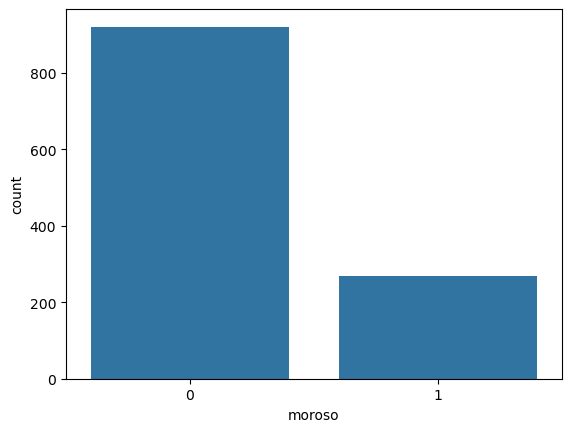

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=credito, x='moroso')
plt.show()


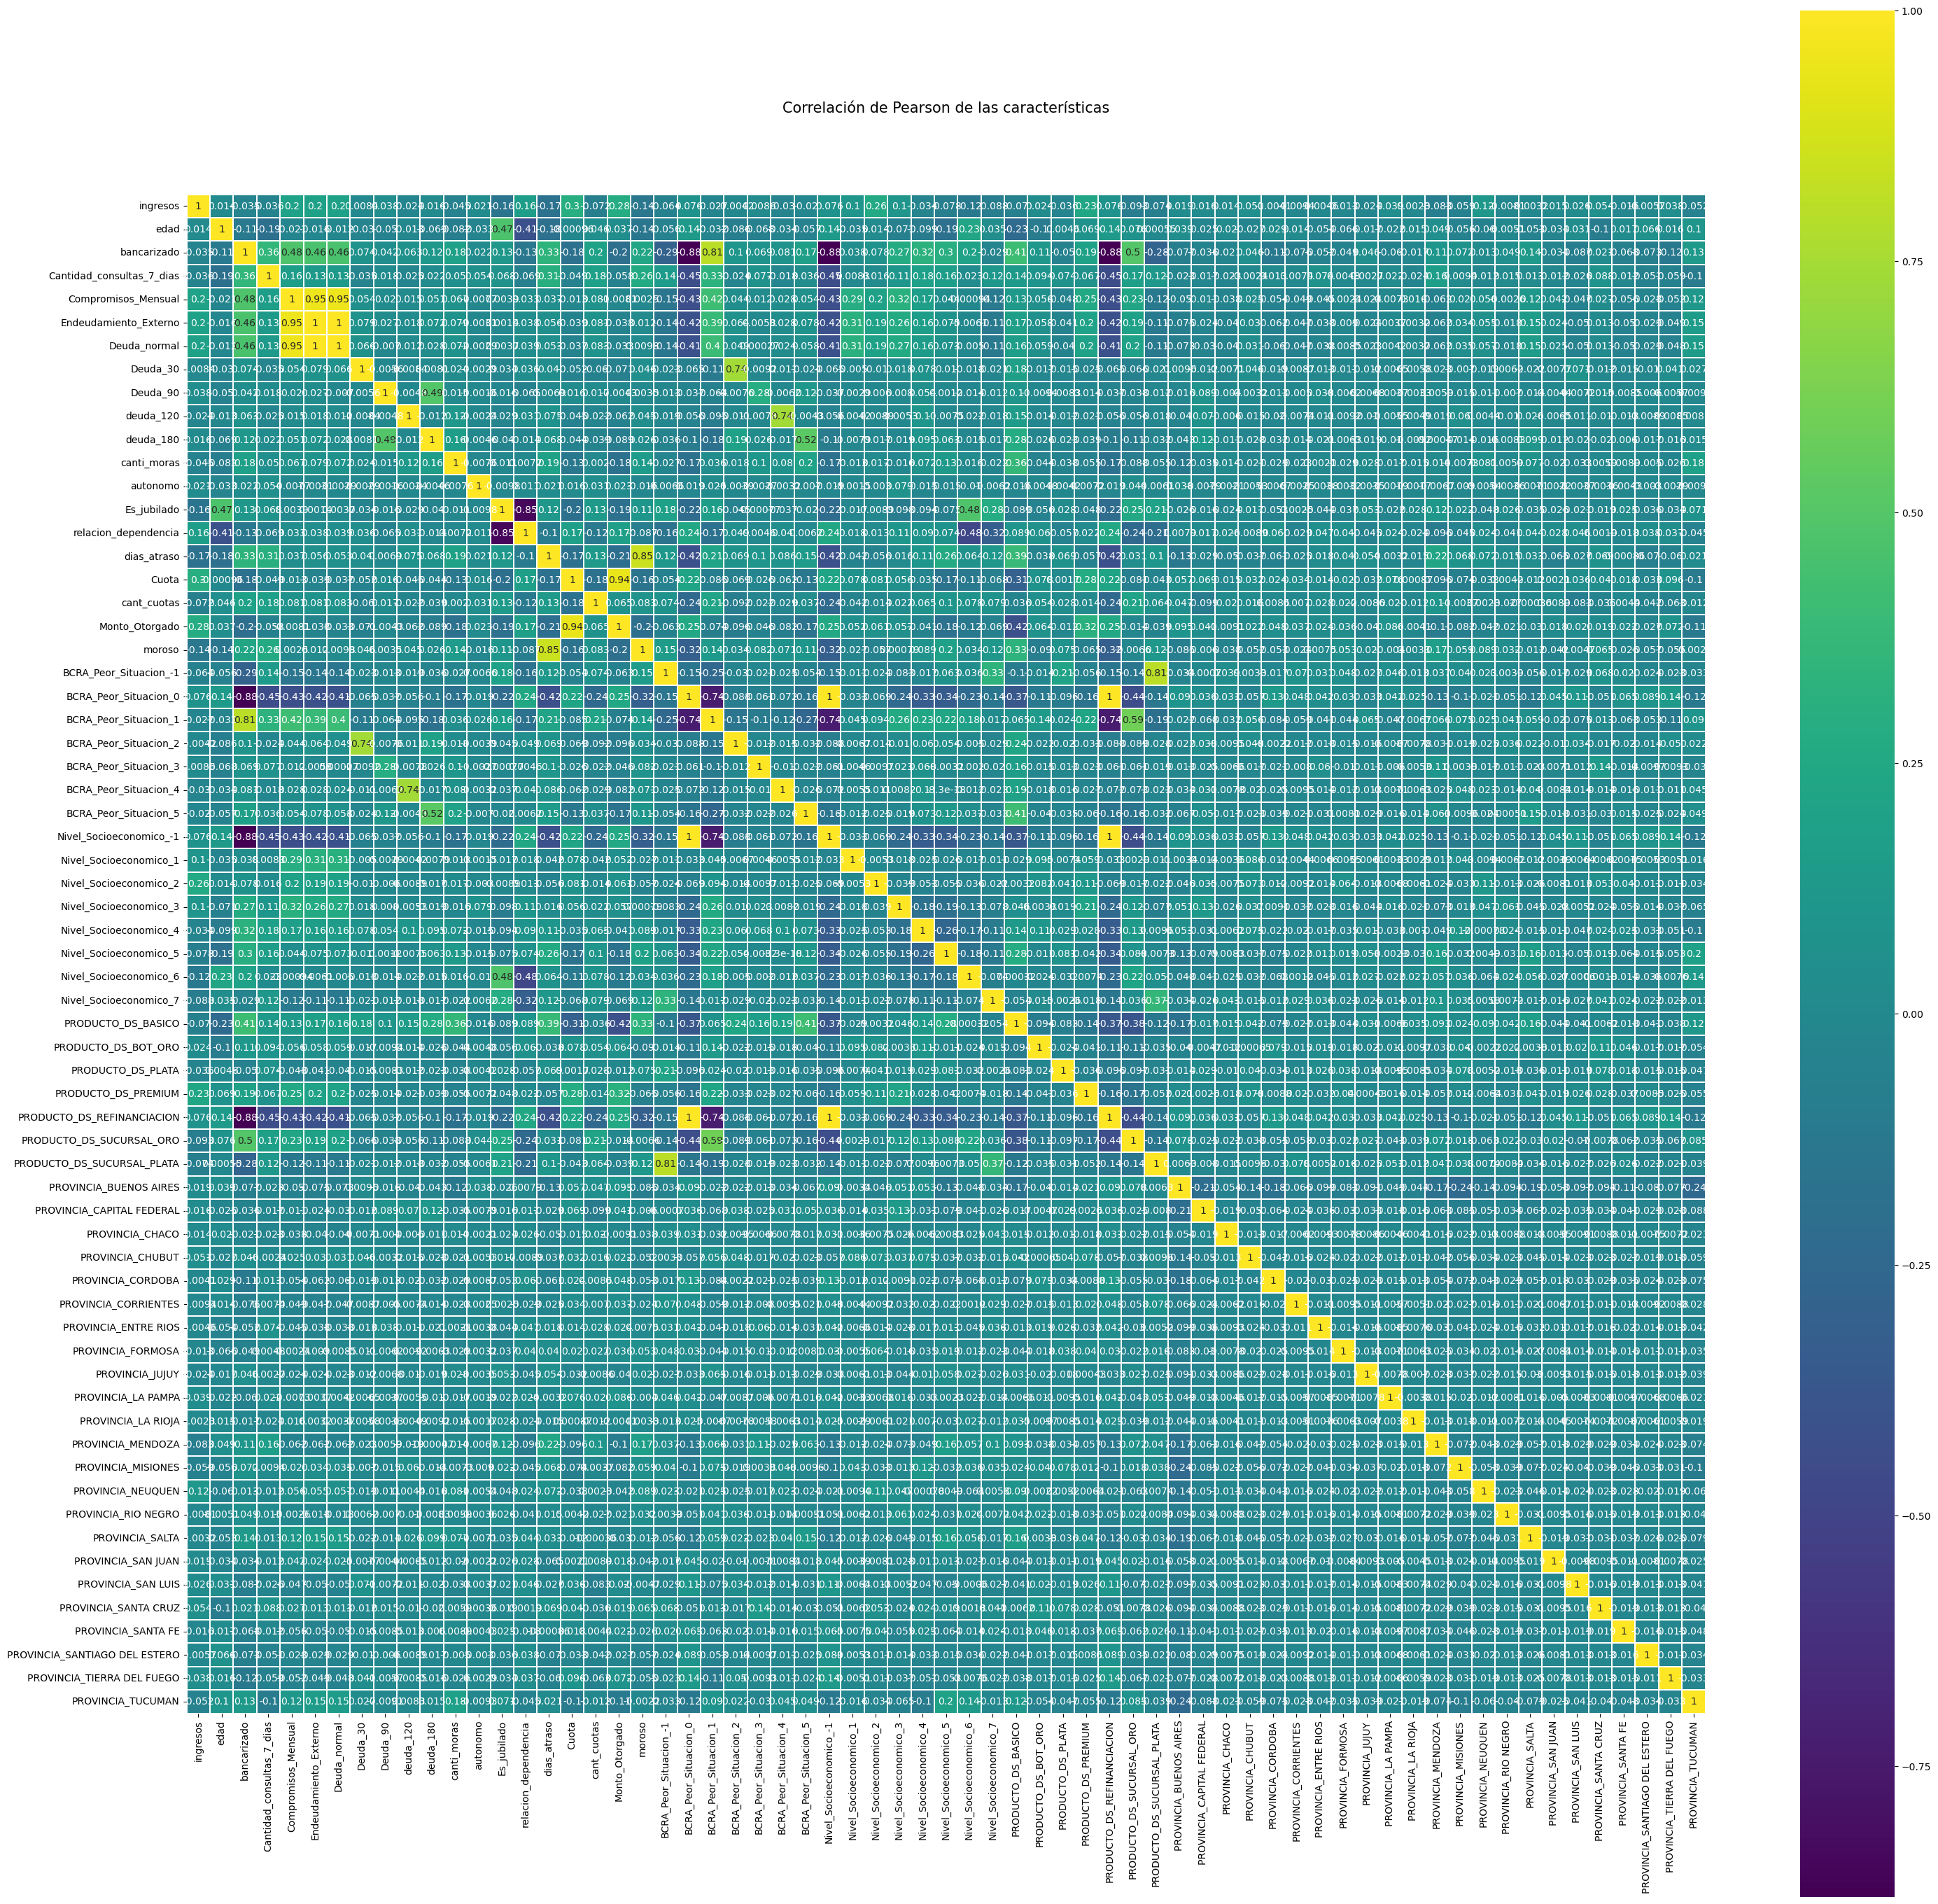

In [32]:
# Veamos si hay correlaciones
colormap = plt.cm.viridis   # mapa de colores
plt.figure(figsize = (35,35))
plt.title('Correlación de Pearson de las características', y = 1.05, size = 15)
sns.heatmap(credito.corr(), linewidths = 0.1, vmax = 1.0, square = True,
            cmap = colormap,linecolor = 'white', annot = True)
plt.show()


1️⃣ No hay multicolinealidad grave en la mayoría de las variables
La mayoría de los cuadros están en verde azulado (correlaciones cercanas a 0).

Esto significa que la mayoría de las variables son independientes entre sí desde el punto de vista lineal.
Es bueno para los modelos, porque no hay mucha redundancia.

2️⃣ Los bloques amarillos indican variables muy relacionadas
Esos “cuadrados” amarillos fuera de la diagonal son principalmente variables dummy creadas por OneHotEncoder.

Ejemplo: si PROVINCIA_CORDOBA es 1, probablemente PROVINCIA_BUENOS AIRES sea 0, y eso genera correlaciones negativas o positivas altas.

Esto no es un problema para modelos como árboles, pero en modelos lineales (regresión logística) conviene evitar colinealidad eliminando una dummy por categoría.

3️⃣ Variables de BCRA y Nivel_Socioeconomico están relacionadas internamente
Veo bloques claros donde las variables BCRA_Peor_Situacion_X y Nivel_Socioeconomico_X están muy correlacionadas entre sí.

Esto es esperable porque son escalas ordinales y cada dummy que representa un valor de esa escala se excluye mutuamente.

4️⃣ Correlación positiva fuerte = variables similares
Hay correlaciones cercanas a 1 (amarillo fuerte) entre variables que son casi equivalentes o complementarias, lo que indica que miden lo mismo con distinta codificación.

Ejemplo típico: cantidad de consultas en cierto periodo vs. una métrica acumulada.

5️⃣ Correlaciones negativas entre dummies
Las correlaciones en morado suelen venir de variables dummy que representan categorías mutuamente excluyentes.

Ejemplo: si PROVINCIA_CORDOBA es 1, todas las demás provincias son 0, lo que crea correlaciones negativas con ellas.

📌 Conclusión general para tu modelo:

Puedes quedarte con casi todas las variables si usas modelos de árbol (RandomForest, XGBoost) porque manejan colinealidad bien.

Si usas modelos lineales, deberías eliminar una dummy por cada variable categórica para evitar multicolinealidad.

Este análisis también sugiere que las features numéricas son en su mayoría independientes, lo que es bueno para la diversidad del modelo.

moroso
0    921
1    269
dtype: int64


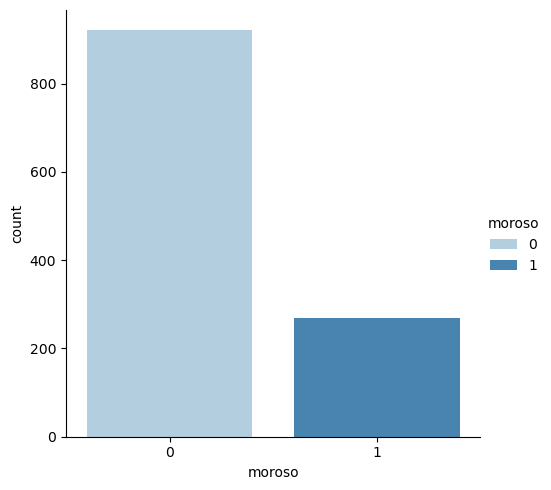

In [33]:
# Veamos como están distribuidas la categoría target 'moroso'
print(credito.groupby('moroso').size())
sns.catplot(data = credito, x='moroso', kind = "count", palette='Blues', hue='moroso')

In [34]:
# Ya está listo el dataset para buscar y entrenar modelos
# Falta estandarizar las características
# Vamos a usar unos sencillos modelos, primero una regresión logística y luego un árbol.
# Armamos un pipeline, pero primero separamos en train, validación y test.

# --------------------------------------------------------------
# PRIMERA ESTRATEGIA: HACER DOS SPLITS PARA OBTENER 3 CONJUNTOS
# --------------------------------------------------------------

# Paso 1 → Primer split: Train provisional (train1) y Test
# Paso 2 → Segundo split: Del train provisional sacamos Train definitivo y Validación
# Esto nos da:
#   - X_train, y_train → entrenamiento del modelo
#   - X_val, y_val     → validación de hiperparámetros
#   - X_test, y_test   → evaluación final
# --------------------------------------------------------------

cred = credito.copy()   # Hacemos una copia para no modificar el DataFrame original

# Definís la variable objetivo (lo que querés predecir): si es moroso o no
y = np.array(cred['moroso'])

# Definís las features (todas las columnas que usa el modelo para aprender): todas las columnas excepto 'moroso'
X = np.array(cred.drop(columns=['moroso']))

# AHORA SE HACEN CORTES EN EL DATASET PARA EMPEZAR A ENTRENAR
# 💡 Es como estudiar para un examen:
# Train = ejercicios que hacés para practicar.
# Validación = simulacros para ver cómo vas y ajustar tu estrategia.
# Test = examen final real.

# Hacés el primer corte del dataset → separamos Train provisional (80%) y Test (20%)
X_train1, X_test, y_train1, y_test = train_test_split(
    X, y,
    test_size=0.2,          # el 20% se guarda para test (lo que el modelo no ve hasta el final)
    stratify=y,             # respeta la proporción de clases (30% morosos y 70% no morosos)
                            # se fija en la proporción original de la columna (moroso) y la respeta en los dos grupos (train y test).
    random_state=6          # siempre se repite el mismo random (6) (Es como anotar para poder repetirlo igual después)
)

# SEGUNDO SPLIT → del Train provisional (X_train1) sacamos Train definitivo (80%) y Validación (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train1, y_train1,     # partís del 80% que ya tenías
    test_size=0.2,          # le sacás el 20% para validación → 20% de 80% = 16% del total
    stratify=y_train1,      # mantiene la proporción de morosos y no morosos
    random_state=6          # asegura que si corrés esto de nuevo, el corte sea igual
)


# Resultado final:
#   - X_train, y_train → 64% del total
#   - X_val, y_val     → 16% del total
#   - X_test, y_test   → 20% del total

# 📦 ¿Para qué sirve cada uno?
# ✅ X_train, y_train (64%)
# Son los datos que el modelo usa para aprender.
# Le mostrás los ejemplos con sus respuestas (moroso o no).
# El modelo “ajusta” sus parámetros mirando estos datos.
# Es como estudiar con ejercicios resueltos.

# 🧪 X_val, y_val (16%)
# Se usan para probar el modelo mientras lo entrenás, sin mostrarle los datos finales.
# Ayuda a ajustar configuraciones: por ejemplo, elegir cuántas capas tiene una red neuronal o qué penalidad poner en una regresión logística.
# Sirve para evitar el overfitting (cuando el modelo aprende de memoria).
# Es como hacer simulacros antes del examen final.

# 🎯 X_test, y_test (20%)
# Son los datos “secretos”, jamás vistos por el modelo, que usás al final para saber si realmente aprendió.
# Se usan una sola vez al final.
# Si el modelo va bien acá, podés confiar en que funcionará con datos reales.
# Es como rendir el examen final.

In [35]:
# ----------------------------------------------------------------------------------------------------------------------------
# Definimos una pipeline para Regresión Logística
# 🎯 ¿Qué estás haciendo acá?
# Estás creando una pipeline de Machine Learning, que es como una línea de producción 
# donde cada paso transforma los datos hasta obtener una predicción.
# ----------------------------------------------------------------------------------------------------------------------------
# La clase LogisticRegression tiene muchos parámetros configurables:
# - penalty: tipo de regularización (default 'l2')
# - C: inverso de la fuerza de regularización (default 1.0)
# - solver: algoritmo de optimización (default 'lbfgs')
# - max_iter: máximo de iteraciones (default 100)
# Aquí dejamos todos en sus valores por defecto, excepto:
#   random_state = 16  → para reproducibilidad
#   n_jobs = -1        → usar todos los núcleos del procesador para acelerar el cálculo
# ----------------------------------------------------------------------------------------------------------------------------

pipe_log = make_pipeline(
    StandardScaler(),                               # Toma tus datos numéricos y los estandariza: ➤ media = 0, desviación estándar = 1.
    LogisticRegression(random_state=16,n_jobs=-1)   # Es el modelo que intenta predecir si un cliente es moroso o no.
)

# Entrenamos la pipeline en el conjunto de entrenamiento puro (X_train, y_train) (aprende los patrones)
pipe_log.fit(X_train, y_train)

# Usa el modelo ya entrenado para hacer predicciones sobre el conjunto de validación.
# Así ves qué tan bien aprendió, sin usar todavía el conjunto de test.
y_pred_log = pipe_log.predict(X_val)

tn, fp, fn, tp = 0.7696335078534031, 0.005235602094240838, 0.0, 0.225130890052356
Val_accuracy = 99.47643979057592%


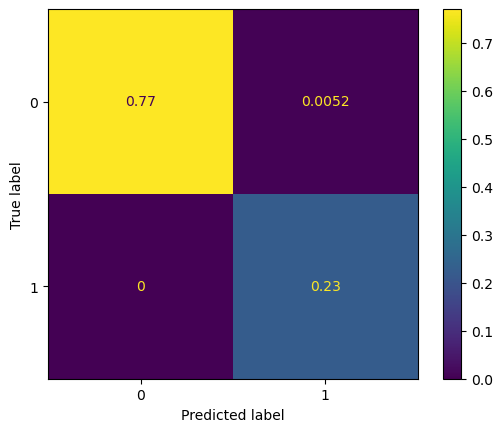

In [36]:
# --------------------------------------------------------------
# Evaluación del modelo con Matriz de Confusión y Accuracy
# --------------------------------------------------------------
# Queremos evaluar qué tan bien funcionó el modelo de regresión logística con los datos de validación (X_val, y_val).
# Y lo hacemos usando una matriz de confusión.
# [[tn, fp],
#  [fn, tp]]


tn, fp, fn, tp = confusion_matrix(
    y_val,          # valores reales
    y_pred_log,     # predicciones del modelo
    normalize="all" # convierte los valores en proporciones (entre 0 y 1)
).ravel()           # ravel() aplana la matriz en un array de 4 valores
print(f'tn, fp, fn, tp = {tn}, {fp}, {fn}, {tp}')

# tn = 0.7696  → 76.96% de los casos fueron bien clasificados como **no morosos**
# fp = 0.0052  → 0.52% fueron mal clasificados como morosos (**falsos positivos**)
# fn = 0.0     → 0% de los morosos reales fueron pasados por alto (**falsos negativos**) ✅
# tp = 0.2251  → 22.51% de los casos fueron bien clasificados como **morosos**

# Generamos la matriz de confusión como tal
conf1 = confusion_matrix(y_val, y_pred_log, normalize='all')

# ConfusionMatrixDisplay → crea un gráfico de la matriz de confusión
ConfusionMatrixDisplay(conf1).plot()

# Calculamos la accuracy (porcentaje de predicciones correctas)
# .score(X_val, y_val) es equivalente a accuracy_score(y_val, y_pred_log)
val_accuracy = 100 * pipe_log.score(X_val, y_val)
print(f'Val_accuracy = {val_accuracy}%')


IMPRESIONANTE LO BIEN QUE FUNCIONAN!!!!!!
y ni siquiera recurrimos al parámetro de balanceo de clases...


tn, fp, fn, tp = 182, 2, 2, 52
Test_accuracy = 98.32%


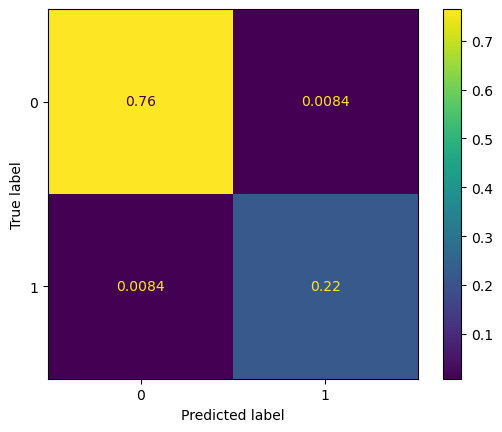

In [37]:
# --------------------------------------------------------------
# Entrenar de nuevo usando TODO el conjunto de entrenamiento (train1)
# y evaluar el rendimiento FINAL sobre el conjunto de TEST (y_test)
# --------------------------------------------------------------

# 1) Re-entrenamos la pipeline con train1 (más datos que X_train) el 100% de los datos
pipe_log.fit(X_train1, y_train1)

# 2) Predicciones sobre el conjunto de TEST (nunca visto por el modelo)
y_pred_log_test = pipe_log.predict(X_test)

# 3) Matriz de confusión en CUENTAS ABSOLUTAS (sin normalize)
#    ravel() devuelve [tn, fp, fn, tp] en ese orden
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_log_test).ravel()
print(f'tn, fp, fn, tp = {tn}, {fp}, {fn}, {tp}')

# 4) Matriz de confusión NORMALIZADA (proporciones) para graficar
conf_log = confusion_matrix(y_test, y_pred_log_test, normalize='all')
ConfusionMatrixDisplay(conf_log).plot()

# 5) Accuracy en TEST (no es validación; renombro para evitar confusión)
test_accuracy = 100 * pipe_log.score(X_test, y_test)
print(f'Test_accuracy = {test_accuracy:.2f}%')


In [38]:
# 2DA ESTRATEGIA: HACER UN SÓLO SPLIT Y USAR VALIDACIÓN CRUZADA Y BÚSQUEDA DE PARAMETROS PARA LA REGRESIÓN LOGÍSTICA
pipe_log = make_pipeline(
    StandardScaler(),  # Paso 1: escalar los datos para que tengan media 0 y varianza 1
    LogisticRegression(random_state=16, max_iter=500)  # Paso 2: modelo de regresión logística
)

# 🔢 Definimos un rango de valores a probar para el hiperparámetro C (controla la regularización)
param_range = [0.01, 0.1, 1.0, 10.0, 100.0]

# 🔍 Creamos una grilla de parámetros para probar diferentes tipos de regularización y solvers
param_grid = [
    {
        # Penalty L1 (Lasso): solo funciona con algunos solvers
        'logisticregression__penalty': ['l1'],
        'logisticregression__solver': ['liblinear', 'saga'],
        'logisticregression__C': param_range
    },
    {
        # Penalty L2 (Ridge): funciona con más solvers
        'logisticregression__penalty': ['l2'],
        'logisticregression__solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga'],
        'logisticregression__C': param_range
    },
    {
        # Penalty ElasticNet: combinación de L1 y L2, solo compatible con 'saga'
        'logisticregression__penalty': ['elasticnet'],
        'logisticregression__solver': ['saga'],
        'logisticregression__l1_ratio': [0.5],  # 0.5 indica mitad L1 y mitad L2
        'logisticregression__C': param_range
    }
]

# 🔎 Creamos el objeto de búsqueda con validación cruzada
gs1 = GridSearchCV(
    estimator=pipe_log,         # La pipeline completa como estimador
    param_grid=param_grid,      # La grilla de parámetros a explorar
    scoring='accuracy',         # Métrica a optimizar: accuracy
    cv=10,                      # Validación cruzada de 10 folds
    n_jobs=-1                   # Usa todos los núcleos de CPU para paralelizar
)

# 🧠 Entrenamos la búsqueda con los datos de entrenamiento
gs1 = gs1.fit(X_train1, y_train1)

# 🏆 Imprimimos los mejores resultados encontrados
print(f'Mejor accuracy: {gs1.best_score_ * 100:.2f} %')      # Mejor promedio de accuracy en los 10 folds
print(f'Mejores parámetros: {gs1.best_params_}')             # Parámetros que lograron ese resultado


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max

Mejor accuracy: 98.95 %
Mejores parámetros: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


🧪 Comparación clave
                        Split simple	                Cross Validation + GridSearch
🔁 Entrenamientos	        1	                         Muchos (ej: 10 x 15 = 150)
⚙️ Ajuste de params	        Manual	                     Automático (grid search)
⏱️ Tiempo	                Rápido	                     Lento
🛡️ Robustez	             Baja (depende del split)	  Alta (se promedian resultados)
📈 Generalización	        Menor	                     Mayor

In [39]:
clf = gs1.best_estimator_ # Toma el mejor modelo encontrado por GridSearchCV, con los mejores hiperparámetros ya elegidos y validados.
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))


Test accuracy: 0.992


In [40]:
gs1.best_params_

{'logisticregression__C': 0.1,
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'liblinear'}

In [41]:
gs1.best_score_

0.9895065789473685

In [4]:
# Veamos qué obtuvimos, a través de la matriz de confusión
y_pred_log=clf.predict(X_test)
print(f'tn, fp, fn, tp = {confusion_matrix(y_test, y_pred_log, normalize="all").ravel()}')
# ahora más 'bonita'
conf1 = confusion_matrix(y_test, y_pred_log, normalize='all')
ConfusionMatrixDisplay(conf1).plot()

NameError: name 'clf' is not defined